Useful files and settings (remove in final version):
- Dropbox Folder: ⁨Dropbox/01.INVESTIGACION/[2020]/2020-03 NCATS Translator Demo
- Tool: PyCharm
- GitHub repo: cedar-translator-demo
- Workspace: workspace folder in the current execution folder
- ARM Jupyter notebook: https://nbviewer.jupyter.org/github/metadatacenter/cedar-experiments-valuerecommender2019/blob/master/ValueRecommenderEvaluation.ipynb 
- cedar-valuerecommender-server: branch 'experiments-curation'
- NCBI E-utilities: https://www.ncbi.nlm.nih.gov/books/NBK25501/
    - The most relevant one for our case is EFetch (https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch)


# _NCATS Biomedical Data Translator - First Segment (demo)_

[Stanford Center for Biomedical Informatics Research](https://bmir.stanford.edu/), 1265 Welch Road, Stanford University School of Medicine, Stanford, CA 94305-5479, USA

\* Correspondence: marcosmr@stanford.edu

## Purpose of this document

This document is a [Jupyter notebook](http://jupyter.org/) that describes the work done during the first segment of the award to develop prototype metadata-curation functionality and to apply it to a subset of metadata records in the NCBI BioSample repository.

The scripts used to generate the results and figures in the paper are in the [scripts folder](./scripts). The results generated when running the code cells in this notebook will be saved to a local `workspace` folder.


## Table of contents
TODO

## <a name="s0"></a>Viewing and running this notebook

GitHub will automatically generate a static online view of this notebook. However, current GitHub's rendering does not support some features, such as the anchor links that connect the 'Table of contents' to the different sections. A more reliable way to view the notebook file online is by using [nbviewer](https://nbviewer.jupyter.org/), which is the official viewer of the Jupyter Notebook project. [Click here](https://nbviewer.jupyter.org/github/metadatacenter/cedar-experiments-curation/blob/master/AAA.ipynb) to open our notebook using nbviewer.

The interactive features of our notebook will not work neither from GitHub nor nbviewer. For a fully interactive version of this notebook, you can set up a Jupyter Notebook server locally and start it from the local folder where you cloned the repository. For more information, see [Jupyter's official documentation](https://jupyter.org/install.html). Once your local Jupyter Notebook server is running, go to [http://localhost:8888/](http://localhost:8888/) and click on `translator-demo.ipynb` to open our notebook. You can also run the notebook on [Binder](https://mybinder.org/) by clicking [here](https://mybinder.org/v2/gh/metadatacenter/translator-demo.ipynb).

## <a name="scenario"></a>Description of possible scenario

A hepatologist / GI oncologist is studying XXX. In order to do that, she needs to analyze a specific type of high-throughput sequencing data generated from liver tissue samples from females with liver cancer. She goes to BioSample and runs the following query:

"disease=liver carcinoma"[attr] AND "sex=female"[attr] AND "tissue=liver"[attr] AND "Homo sapiens"[Organism]

This query does not return any results. However, using different terminological variations of the query (e.g., ‘hepatocellular carcinoma’ instead of ‘liver carcinoma’) is possible to find XXX and XXX. With these results, the researcher is able to XXX and XXX.

## <a name="s1"></a>Step 1: Dataset download
On Jan 14, 2020, we downloaded the full content of the [NCBI BioSample database](https://www.ncbi.nlm.nih.gov/biosample/) from the [NCBI BioSample FTP repository](https://ftp.ncbi.nih.gov/biosample/) as a .gz file. The size of the file downloaded is 944 MB and it contains 12,558,194 samples.


In [2]:
%%time
# Filter the NCBI samples
%run ./scripts/step1_download.py

Source URL: https://ftp.ncbi.nih.gov/biosample/biosample_set.xml.gz
Destination file: ./workspace/samples/source/biosample_set.xml.gz
CPU times: user 18.2 s, sys: 7.97 s, total: 26.2 s
Wall time: 51.7 s


## <a name="s2"></a>Step 2: Filter - Homo sapiens

We filtered the initial set of samples to keep only the "Homo sapiens" samples (organism=Homo sapiens). We processed a total of 12,558,194 samples and kept a total of 6,279,693 Homo sapiens samples (50%).

Script used: [step2_filter_homo_sapiens.py](scripts/step2_filter_homo_sapiens.py).

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step2_filter_homo_sapiens.py

The destination file already exist. Do you want to overwrite it [y/n]?Y
Input file: ./../workspace/samples/source/biosample_set.xml.gz
Output file: ./../workspace/samples/filtered/homo_sapiens/biosample_filtered.xml
Processing NCBI samples...
Processed samples: 100000
Selected samples: 37112
Processed samples: 200000
Selected samples: 82285
Processed samples: 300000
Selected samples: 141486
Processed samples: 400000
Selected samples: 241486
Processed samples: 500000
Selected samples: 341486
Processed samples: 600000
Selected samples: 436907
Processed samples: 700000
Selected samples: 518736
Processed samples: 800000
Selected samples: 594660
Processed samples: 900000
Selected samples: 694660
Processed samples: 1000000
Selected samples: 778747
Processed samples: 1100000
Selected samples: 854501
Processed samples: 1200000
Selected samples: 953406
Processed samples: 1300000
Selected samples: 1053405
Processed samples: 1400000
Selected samples: 1153405
Processed samples: 1500000
Selected sa

## <a name="s3"></a>Step 3: Exploratory analysis - Attribute names from Homo sapiens samples

Script used: [step3_analysis_attributes.py](scripts/step3_analysis_attributes.py).

This analysis is limited to the 6.3M BioSample Homo sapiens samples coming from the previous step. 

The execution of this script will generate four .csv files with the values of the three attributes used in the BioSample XML file to store the attribute names:
* attribute_names.csv: Attribute names and count.
* display_names.csv: Display names and count.
* harmonized_names.csv: Harmonized names and count.
* all_names.csv: Combination of attribute name, display name, and harmonized name, and its count.

These files will be stored at the [workspace/samples/analysis](workspace/samples/analysis) folder.

**TODO: generate output where with the attribute names and its corresponding variations (harmonized and non-harmonized), grouped by attribute name, instead of just a list of all variations.**

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step3_analysis_attributes.py

Input file: ./workspace/samples/filtered/homo_sapiens/biosample_filtered.xml
Processing NCBI samples...
Processed samples: 100000
Processed samples: 200000
Processed samples: 300000
Processed samples: 400000
Processed samples: 500000
Processed samples: 600000
Processed samples: 700000
Processed samples: 800000
Processed samples: 900000
Processed samples: 1000000
Processed samples: 1100000
Processed samples: 1200000
Processed samples: 1300000
Processed samples: 1400000
Processed samples: 1500000
Processed samples: 1600000
Processed samples: 1700000
Processed samples: 1800000
Processed samples: 1900000
Processed samples: 2000000
Processed samples: 2100000
Processed samples: 2200000
Processed samples: 2300000
Processed samples: 2400000
Processed samples: 2500000
Processed samples: 2600000
Processed samples: 2700000
Processed samples: 2800000
Processed samples: 2900000
Processed samples: 3000000
Processed samples: 3100000
Processed samples: 3200000
Processed samples: 3300000
Processed samp

Note that in the array with the required attributes we only include as variations those strings are don't have a corresponding harmonized name.

See official synonyms at: https://www.ncbi.nlm.nih.gov/biosample/docs/attributes/

Results of analysis:

Attribute name: sex
* Variations (harmonized)
    * sex (4,625,561)
    * Sex (193,644)
    * gender (32,323)
    * GENDER (7,838)
    * ArrayExpress-Sex (3,324)
    * DONOR_SEX (926)
    * donor sex (480)
    * Gender (387)
    * SEX (292)
    * ArrayExpress-SEX (268)
    * sample gender (90)
    * Experimental Factor: Sex (8)
* Variations (non-harmonized)
    * cell sex (2,543)  
    * patient gender (1,038)
    * donor gender (617)
    * patient_gender (417)
    * c_sex_all (483)
    * subject sex (468)
    * subject gender (203)
    * Array's reference DNA's sex (170)
    * DNA sex (102)
    * fetal sex (98) (?)
    * biological sex (92)
    * fetal gender (76) (?)
    * cell line source gender (75)
    * patient sex (73)
    * biologic sex (92)
    * gender source (16) (?)
    * sex of donor (12)
    * gender of donor (12)
    * human gender (12)
    * sex chromosomes (6)
    * sex/karyotype (5)
    * cell source subject gender (3)
    * biological_sex (1)

Attribute name: tissue
* Variations (harmonized)
    * body site (2797078)
	* tissue (454459)
	* organism part (216833)
	* tissue_type (12198)
	* organ (7261)
	* Tissue (4005)
	* tissue type (3723)
	* body_site (3285)
	* tissue-type (2240)
	* source tissue (700)
	* TISSUE_TYPE (467)
	* tissue origin (419)
	* OrganismPart (167)
	* TISSUE (161)
	* ArrayExpress-OrganismPart (148)
	* ArrayExpress-ORGANISM_PART (84)
	* tissuetype (79)
	* tissue_origin (60)
	* tisssue (8)
	* Tissue Type (2)
* Variations (non-harmonized)
	* tissue supergroup (9361) (I've checked that this is equivalent to tissue. Query: "tissue supergroup=lung"[attr]) 
	* tissue source (2680)
	* metastatic tissue (1593)
    * DiseaseLocation (1008)
	* tissue subtype (766)
	* tissue archive method (382)
	* tissue compartment (370)
	* tissue of origin (311)
	* tissue/cell type source (204)
	* tissue region (169)
	* tissue id (153)
	* tissue diagnosis (139)
	* tissue preparation (122)
	* tissue collection (95)
	* tissue/treatment id (84)
	* tissue/cells (74)
	* tissue/position (73)
	* metatastic tissue (68)
	* tissue side (66)
	* resident tissue (66)
	* tissue/status (60)
	* tissue harvest site (58)
	* type of liver tissue (48)
	* tissue processing (47)
	* tissue state (46)
	* tissue derivation (44)
	* tissue nature (44)
	* Tissue collected (43)
	* tissue source/type (41)
	* tissue subtype/brodmann area (41)
	* cell line or tissue (40)
	* cell or tissue type (40)
	* cell/tissue type (39)
	* tissue lineage (34)
	* developmental stage/tissue (30)
	* primary tissue (26)
	* thyroid tissue type (20)
	* tissue/cell line (20)
	* tissue culture substrate (20)
	* cell_line/tissue (19)
	* tissue storage (18)
	* date of tissue preparation (18)
	* cancer tissue source (18)
	* Reason why donor tissue was not suitable for transplantation (18)
	* tissue site (17)
	* idh1 status in tumor tissue (15)
	* tissue condition (15)
	* cell line/tissue (15)
	* cell-type/tissue (14)
	* tissue disease state (14)
	* tissue group (13)
	* cell line tissue source (13)
	* originating tissue (12)
	* tissue section (12)
	* primary tumor tissue (12)
	* adjacent normal tissue (12)
	* tissue source and immunoselection of cells (12)
	* tissue soure (11)
	* tissue location (10)
	* tissue code (9)
	* xenograft tissue (6)
	* cell line source tissue (6)
	* tissue/cell (5)
	* mouse tissue (5)
	* gestional age of tissue (5)
	* location in tissue (4)
	* tissue cell line (4)
	* orginal tissue (4)
	* developmental tissue (4)
	* tissue type/source (3)
	* tissue appendix (2)
	* tissue resource (2)
	* tissue status (2)
	* primary tissue status (1)

Attribute name: disease
* Variations (harmonized)
    * disease state (197,153)
	* disease (118,836)
	* disease status (5596)
	* DISEASE (1375)
	* Disease (235)
	* diseasestatus (214)
	* DiseaseState (152)
	* ArrayExpress-DiseaseState (148)
	* disease_state (30)
	* disease_status (26)
	* diseases (24)
	* Disease Status (8)
	* ArrayExpress-DISEASE_STATE (2)
* Variations (non-harmonized)
	* diseaseseverity (13126) (I've checked that it's equivalent to disease)
	* disease staging (8599)
	* DiseaseStaging (7933)
	* clincial information - disease outcome (1006)
	* original disease abbreviation (935)
	* original disease annotation (932)
	* disease group (655)
	* disease detection (522)
	* death from disease (498)
	* CIS in disease course (476)
	* Disease staging (458)
	* DiseaseOutcome (456)
	* disease recurrence (349)
	* DiseaseStateDatabase (326)
	* tb_disease_type (313)
	* disease progression (binary) (306)
	* time since diagnosis of advanced disease (306)
	* disease type (288)
	* DiseaseFreeInterval (268)
	* disease subtype (268)
	* DiseaseLocati (264)
	* dead of disease (258)
	* DiseaseFactor (232)
	* ClinicalInformation:Disease subtype (202)
	* disease status at last clinical followup (155)
	* DEATH RELATED TO DISEASE (146)
	* disease free survival (142)
	* histology of invasive disease (129)
	* disease classification (126)
	* tfc_disease_stage (124)
	* disease_phenotype_replicate (124)
	* status of disease (121)
	* disease activity (120)
	* LengthOfDisease (113)
	* PriorTherapiesForPrimaryDiseaseUnderStudy (113)
	* DiseaseStateOfSample (101)
	* Disease-Free Survival Status (100)
	* Day 7 Minimal Residual Disease (98)
	* primary disease (96)
	* Disease factor (94)
	* Day 28 Minimal Residual Disease (86)
	* disease abbreviation (78)
	* originalDisease (77)
	* disease_severity (66)
	* Day 14 Minimal Residual Disease (56)
	* DiseaseRecurrence (50)
	* disease_age_at_onset (47)
	* DiseaseFreeAfterTwoYears (44)
	* disease diagnosis (44)
	* characteristics:disease (43)
	* disease_subtype (43)
	* disease condition (39)
	* disease level (38)
	* disease at diagnosis (36)
	* disease_duration_days (35)
	* DiseaseSta (32)
	* disease_duration_yrs (30)
	* underlying disease (29)
	* disease/status (28)
	* donor disease status (28)
	* family history of diverticular disease (26)
	* disease onset (24)
	* disease course (24)
	* cause of liver disease (24)
	* primary_disease (23)
	* DISEASE_ONTOLOGY_URI (22)
	* disease severity (22)
	* disease/health status (21)
	* disease site (21)
	* disease_diagnose (20)
	* disease duration in weeks (19)
	* Disease_Factor (18)
	* pre-transplant disease (17)
	* DiseaseType (16)
	* coronary artery disease status (16)
	* cardiac disease (16)
	* tissue disease state (14)
	* disease_extent (13)
	* disease/genotype (12)
	* disease model (12)
	* DiseaseStateOfSample1 (12)
	* disease_type (9)
	* current disease Stage (8)
	* disease ontology uri (6)
	* age/disease (6)
	* disease_duration_years (6)
	* disease_length (5)
	* diseaset state (4)
	* siod disease status (2)
	* disease associated genotype (1)
	* disease_state_sample (1)
	* disease.ontology (1)
	* disease.text (1)


In order to perform the filtering, we will use the harmonized name for each attribute plus the non-harmonized variations that have more than 500 occurrences. That is, we will use the following variations:

```json
NCBI_ATTS_AND_VARIATIONS = \
    [{"name": "sex", "variations": ["sex", "cell sex", "patient gender", "donor gender"]},
     {"name": "tissue", "variations": ["tissue", "tissue supergroup", "tissue source", "metastatic tissue",
                                       "DiseaseLocation", "tissue subtype"]},
     {"name": "disease", "variations": ["disease", "diseaseseverity", "disease staging", "DiseaseStaging",
                                        "clincial information - disease outcome", 
                                        "original disease abbreviation",
                                        "original disease annotation", "disease group"]},
     {"name": "cell_line", "variations": ["cell_line"]},
     {"name": "cell_type", "variations": ["cell_type"]},
     {"name": "age", "variations": ["age"]}]
```

## <a name="s4"></a>Step 4: Filter by attributes - Homo sapiens and attributes: sex, tissue, disease

We filtered the Homo sapiens samples based on two criteria:
* The sample is from "Homo sapiens" (organism=Homo sapiens).
* The sample has non-empty values for the following fields: *sex, tissue, disease*

Script used: [step4_filter_hs_atts1.py](scripts/step4_filter_hs_atts1.py).

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step4_filter_hs_atts1.py

The destination file already exist. Do you want to overwrite it [y/n]? y
Input file: ./workspace/samples/filtered/homo_sapiens/biosample_filtered.xml
Output file: ./workspace/samples/filtered/hs_and_atts/biosample_filtered.xml
Required attributes: ['sex', 'tissue', 'disease']
Processing NCBI samples...
Processed samples: 100000
Selected samples: 143
Processed samples: 200000
Selected samples: 143
Processed samples: 300000
Selected samples: 143
Processed samples: 400000
Selected samples: 143
Processed samples: 500000
Selected samples: 197
Processed samples: 600000
Selected samples: 320
Processed samples: 700000
Selected samples: 320
Processed samples: 800000
Selected samples: 358
Processed samples: 900000
Selected samples: 393
Processed samples: 1000000
Selected samples: 393
Processed samples: 1100000
Selected samples: 393
Processed samples: 1200000
Selected samples: 393
Processed samples: 1300000
Selected samples: 393
Processed samples: 1400000
Selected samples: 393
Processed samples: 

## <a name="s5"></a>Step 5: Filter by attributes - Homo sapiens, basic attributes, and other attribute combinations

Total samples processed: 161,705

### Filter 2. organism=Homo sapiens, sex, tissue, disease, **cell type, cell line, age**

Script used: [step5_filter2.py](scripts/step5_filter2.py).

Total samples selected: 5,624 


### Filter 3. organism=Homo sapiens, sex, tissue, disease, **cell type**

Script used: [step5_filter3.py](scripts/step5_filter3.py).

Number of resulting samples: 65,920


### Filter 4. organism=Homo sapiens, sex, tissue, disease, **cell line**

Script used: [step5_filter4.py](scripts/step5_filter4.py).

Number of resulting samples: 22,100


### Filter 5. organism=Homo sapiens, sex, tissue, disease, **age**

Script used: [step5_filter5.py](scripts/step5_filter5.py).

Number of resulting samples: 119,898
    
    
Now, with the following filter, we will also filter by attribute values:

### Filter 6. organism=Homo sapiens, sex, tissue, **disease=liver cancer**

Script used: [step5_filter6.py](scripts/step5_filter5.py).

Number of resulting samples: 834






## <a name="s7"></a>Step 7: Export to CSV

Export to CSV the samples resulting from applying filter no. 6.

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step6_export_to_csv.py

The destination file already exist. Do you want to overwrite it [y/n]? y
Input file: ./workspace/samples/filtered/filter6/20200117-141930_biosample_filtered_834.xml
Output file: ./workspace/samples/export/biosample_exported.csv
Attributes to be exported: [{'att_name': 'sex', 'att_values': []}, {'att_name': 'tissue', 'att_values': []}, {'att_name': 'disease', 'att_values': []}]
Processing NCBI samples...
Finished processing NCBI samples
- Total samples processed: 834
- Total samples exported: 834
CPU times: user 954 ms, sys: 14.1 ms, total: 968 ms
Wall time: 3.25 s


## <a name="s8"></a>Step 8: Analysis - Unique values

List (and plot) the CSV file generated.

GENERAL DESCRIPTION OF THE DATASET: 
         sex tissue                   disease
count    834    834                       834
unique     5      9                         3
top     male  liver  hepatocellular carcinoma
freq     686    573                       711

UNIQUE VALUES PER COLUMN: 
  Column name: sex
    Unique values (5): 
     - male
     - female
     - not available
     - not applicable
     - not collected
  Column name: tissue
    Unique values (9): 
     - liver
     - Liver
     - blood
     - hepatocellular carcinoma
     - non-cancerous liver tissue
     - cancerous liver tissue
     - liver cell line
     - plasma
     - blood cell
  Column name: disease
    Unique values (3): 
     - hepatocellular carcinoma
     - hepatoma
     - liver cancer


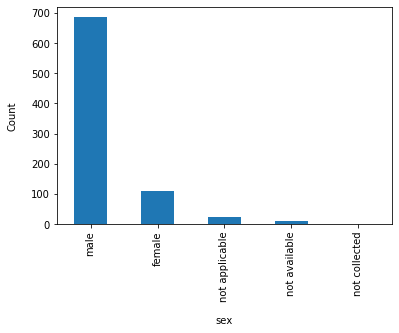

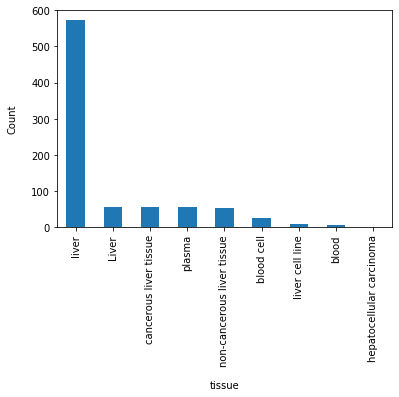

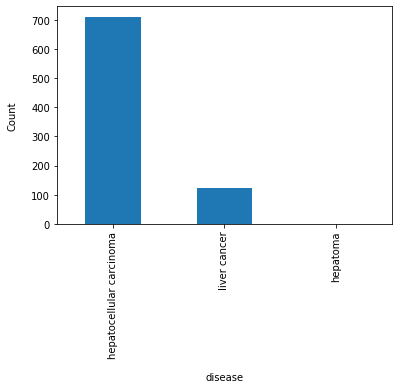

disease                   tissue                      sex           
hepatocellular carcinoma  Liver                       female              8
                                                      male               47
                          blood                       female              2
                                                      male                4
                          cancerous liver tissue      female             12
                                                      male               44
                          hepatocellular carcinoma    male                1
                          liver                       female             60
                                                      male              433
                                                      not applicable     24
                                                      not available      12
                                                      not collected       1
                   

<Figure size 432x288 with 0 Axes>

In [1]:
%%time
%matplotlib inline
# Filter the NCBI samples
%run ./scripts/step7_analysis_values.py

------------------------------------------------ STOPPED HERE -------------------------------------------------------

Possible BioSample query:

"disease=liver cancer"[attr] AND "sex=male"[attr] AND "tissue=liver"[attr] AND "Homo sapiens"[Organism] 

Link: https://www.ncbi.nlm.nih.gov/biosample/?term=%22disease%3Dliver+cancer%22%5Battr%5D+AND+%22sex%3Dmale%22%5Battr%5D+AND+%22tissue%3Dliver%22%5Battr%5D+AND+%22Homo+sapiens%22%5BOrganism%5D

Number of results: 34










In [ ]:
%%time
# Filter the NCBI samples
%run ./scripts/step2_filtering.py

Execution results:
Finished processing NCBI samples
- Total samples processed: 11,625,524
- Total samples selected: 262,114

The result is an XML file with 262,114 samples ([biosample_filtered.xml](./workspace/samples/filtered/biosample_filtered.xml)). 

### <a name="s2-3"></a>2.3. Generate CEDAR instances

We transformed the samples obtained from the previous step to CEDAR template instances conforming to [CEDAR's JSON-based Template Model](https://metadatacenter.org/tools-training/outreach/cedar-template-model).

Script used: [step3_instance_generation.py](scripts/step3_instance_generation.py): 

In [1]:
%%time
# Generate CEDAR instances from NCBI samples
%run ./scripts/step3_instance_generation.py

Reading file: ./workspace/samples/filtered/biosample_filtered.xml
Extracting all samples from file (no. samples: 262114)
Randomly picking 262114 samples
Generating CEDAR instances...
No. instances generated: 10000 (4%)
No. instances generated: 20000 (8%)
No. instances generated: 30000 (11%)
No. instances generated: 40000 (15%)
No. instances generated: 50000 (19%)
No. instances generated: 60000 (23%)
No. instances generated: 70000 (27%)
No. instances generated: 80000 (31%)
No. instances generated: 90000 (34%)
No. instances generated: 100000 (38%)
No. instances generated: 110000 (42%)
No. instances generated: 120000 (46%)
No. instances generated: 130000 (50%)
No. instances generated: 140000 (53%)
No. instances generated: 150000 (57%)
No. instances generated: 160000 (61%)
No. instances generated: 170000 (65%)
No. instances generated: 180000 (69%)
No. instances generated: 190000 (72%)
No. instances generated: 200000 (76%)
No. instances generated: 210000 (80%)
No. instances generated: 22000

## <a name="s4"></a>Step 3: Generation of experimental data sets

When we generated the CEDAR instances (step 2.3), we partitioned the resulting instances for each database (NCBI, EBI) into two datasets, with 85% of the data for training and the remaining 15% for testing.

## <a name="s5"></a>Step 5: Training

We mined association rules from the training sets to discover the hidden relationships between metadata fields. We extracted the rules using a local installation of the CEDAR Workbench. We set up the Value Recommender service to read the instance files from a local folder by updating the [Constants.java](https://github.com/metadatacenter/cedar-valuerecommender-server/blob/master/cedar-valuerecommender-server-core/src/main/java/org/metadatacenter/intelligentauthoring/valuerecommender/util/Constants.java) file as follows:

```Java
READ_INSTANCES_FROM_CEDAR = false // Read training instances from a local folder
```

Uupdate the variable `CEDAR_INSTANCES_PATH` with the full path of the corresponding training set: `workspace/cedar_instances/ncbi_cedar_instances/training`

Internally, CEDAR's Value Recommender uses a [WEKA's implementation of the Apriori algorithm](https://www.cs.waikato.ac.nz/ml/weka/).

Compile the `cedar-valuerecommender-server` project and start it locally. You can trigger the rule generation process from the command line using the following curl command:
```
curl --request POST \
  --url https://valuerecommender.metadatacenter.orgx/command/generate-rules/<TEMPLATE_ID> \
  --header 'authorization: apiKey <CEDAR_ADMIN_API_KEY>' \
  --header 'content-type: application/json' \
  --data '{}'
```

where `CEDAR_ADMIN_API_KEY` is the API key of the *cedar-admin* user in your local CEDAR system, and `TEMPLATE_ID` is the local identifier of the template that you want to extract rules for.

--------end of document-------





### Rules generation
Take the text instances from the arm experiment and run the server with the READ_INSTANCES_FROM_CEDAR constant set to false, and with the right path for the constant CEDAR_INSTANCES_PATH.

### Rules ingestion

1. Delete the existing rules in Elasticsearch: `cedarat rules-regenerateIndex`
2. Download the NCBI (text-based) rules: https://drive.google.com/file/d/1ngCTGf4To1NZ1puRsB3aaCvtZIAERktY/view?usp=sharing
3. Extract the rules to a local folder. Then, import the 30,295 rules using:
    
    `elasticdump --input=./ncbi-text-rules-data.json --output=http://localhost:9200/cedar-rules --type=data`
    
    
4. Check that the rules have been imported correctly using Kibana (http://localhost:5601):
    
    `GET cedar-rules/_search`
    
5. Script used to generate recommendations: ...    

Notes:
- I will use the rules generated from the training set. Then, I will use the test set to evaluate the curation process.

Other possible topics to mention:
- Configuration settings


## References

* ARM-evaluation Jupyter notebook: https://nbviewer.jupyter.org/github/metadatacenter/cedar-experiments-valuerecommender2019/blob/master/ValueRecommenderEvaluation.ipynb#s5-results

In [ ]:
elasticdump --input=./ncbi-text-data.json --output=http://localhost:9200/cedar-rules --type=data

In [ ]:
elasticdump --input=./ncbi-text-data.json --output=http://localhost:9200/cedar-rules --type=data